<a href="https://colab.research.google.com/github/Vikram-Coursework/Final_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Using Convolutional Neural Network (CNN), from the Covid-19 Image Dataset Predict whether it's Covid, Normal or Viral Pnenumonia. 

Covid Dataset can be downloaded here: https://drive.google.com/drive/folders/1YPmEaCZN2ZwRd8kK81sNUbcu_fm22yop?usp=sharing


      
## Importing Python Libraries

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import cv2
import PIL.Image as Image

import numpy as  np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


##  Load covid dataset

In [2]:
data_dir = '/content/gdrive/MyDrive/Data/Covid19-dataset'
print(data_dir)

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
print(type(data_dir))

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/content/gdrive/MyDrive/Data/Covid19-dataset
<class 'pathlib.PosixPath'>
251


In [3]:
# Create the dictionary for the covid images

covid_images_dict = {
    'Covid': list(data_dir.glob('Covid/*')),
    'Normal': list(data_dir.glob('Normal/*')),
    'Viral Pneumonia': list(data_dir.glob('Viral Pneumonia/*')),
}

In [4]:
covid_labels_dict = {
    'Covid': 0,
    'Normal': 1,
    'Viral Pneumonia': 2,
}

In [5]:
X, y = [], []

for covid_name, images in covid_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(covid_labels_dict[covid_name])

In [6]:
X = np.array(X)
y = np.array(y)

## Train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

# Representing Labels using one-hot-encoding

In [8]:
k = np.unique(y).size

Y_oh_train = to_categorical(y_train, k) 
Y_oh_val = to_categorical(y_val, k) 
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 0 1 1 0]

Y_oh_train[:5]=
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Preprocessing: scale images

In [9]:
X_train_scaled = X_train / 255
X_val_scaled = X_val /255
X_test_scaled = X_test / 255

## develop a Convolutional Neural Network and train & test the covid data

In [10]:
# created a convolutional neural network model with 8 layers (1 input layer, 3 convolutional layers, 
# 2 dropout layers, 1 max pooling layer, 1 output layer)

def my_CNN_Model(my_shape = (224,224,3),k = 3, lr = 1e-4):
        
    model_input = tf.keras.layers.Input(shape = my_shape)
    l1 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(l1)
    l2_drop = tf.keras.layers.Dropout(0.25)(l2)
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)
    l4 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l3)
    l4_drop = tf.keras.layers.Dropout(0.25)(l4)
    flat = tf.keras.layers.Flatten()(l4_drop)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    return model


In [11]:
model = my_CNN_Model()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 48)      1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 48)      20784     
                                                                 
 dropout (Dropout)           (None, 224, 224, 48)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 48)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 96)      41568     
                                                             

In [12]:
my_epochs = 20

history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                      epochs=my_epochs,verbose=1)

Epoch 1/20
5/5 [==============================] - 12s 664ms/step - loss: 509.6342 - accuracy: 0.3467 - val_loss: 203.9093 - val_accuracy: 0.4200
Epoch 2/20
5/5 [==============================] - 1s 166ms/step - loss: 129.3340 - accuracy: 0.5800 - val_loss: 110.3973 - val_accuracy: 0.3200
Epoch 3/20
5/5 [==============================] - 1s 168ms/step - loss: 65.6027 - accuracy: 0.5933 - val_loss: 32.0795 - val_accuracy: 0.6600
Epoch 4/20
5/5 [==============================] - 1s 186ms/step - loss: 30.4772 - accuracy: 0.7133 - val_loss: 14.1069 - val_accuracy: 0.6800
Epoch 5/20
5/5 [==============================] - 1s 165ms/step - loss: 15.9215 - accuracy: 0.7733 - val_loss: 8.7257 - val_accuracy: 0.8400
Epoch 6/20
5/5 [==============================] - 1s 166ms/step - loss: 3.7845 - accuracy: 0.9333 - val_loss: 2.1542 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 1s 165ms/step - loss: 4.8329 - accuracy: 0.8867 - val_loss: 2.4096 - val_accuracy: 0.9000
Epoch 

In [13]:
test_accuracy = model.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy)

2/2 [==============================] - 1s 594ms/step - loss: 0.8900 - accuracy: 0.9608
[0.88997483253479, 0.9607843160629272]


Final loss (cross-entropy and accuracy): [1.583847165107727, 0.9607843160629272]



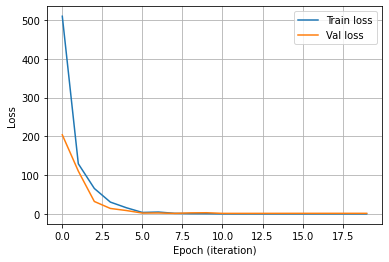

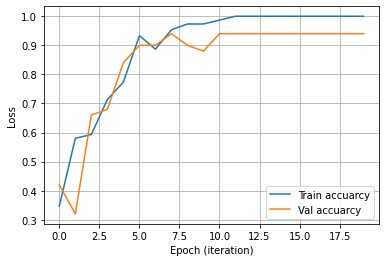

In [14]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


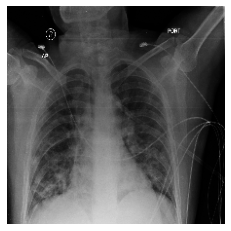

In [15]:
# choose an image from the testing dataset for testing

import matplotlib.pylab as plt

testing_image = X_test_scaled[15]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]

In [16]:
prediction = model.predict(testing_image)

labels = list(covid_labels_dict.keys())

predicted_label =labels[np.argmax(prediction)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 0s 224ms/step
The predicted label for this image is:  Covid
